# Project work, part 1

### Links

GitHub repo link: 
https://github.com/sarahorte/ind320project.git

Streamlit app link: 
https://ind320project.streamlit.app/

Minimum working example app:
https://ind320example-app.streamlit.app/

### AI usage
Asking ChatGPT to create a minimum working example of a Streamlit app. Using the suggenstion as a basis, but making minor changes. 

Asking ChatGPT to offer code that: Read the supplied CSV file using Pandas, Print its contents in a relevant way, Plot each column separately, Plot all columns together. Using the anser the base. Asking for furhter assistance to make the plots nicer.
Getting more help from chatGPT to plot all the colums togheter. Making adjustments until I get the result I want. 

With the streamlit app, I asked ChatGPT to make a base for the app with the st.Page and st.navigation structure, which is recommended in the streamlit documentation.

Also asking for help with the data page and plotting. I wanted to plot similarly as in the notebook, with arrows for wind direction, but I did not manage that. The arrows are probably not completely correct in the notebook either. After struggeling I decided to plot the wind direction on the right y-axis and the rest of the variables on the left y-axis, and got some help from ChatGPT to do this.

For the log describing the compulsory work, I fed ChatGPT with my log and asked it to "write better and in maximum 500 words".

### Log

In this compulsory work I used both Jupyter Notebook and Streamlit to analyze and present weather data. The goal was to understand the dataset and then create an interactive application where the results could be explored in a flexible way.

I started by creating a GitHub repository for the project and preparing the necessary files. To get going, I made a minimum working example to test that everything functioned correctly before moving on to more advanced features.

The first real work was done in Jupyter Notebook. I imported the dataset and examined its structure. The dataset contained hourly values of temperature, wind speed, wind gusts, wind direction, and precipitation throughout 2020. I was first asked to plot each column separately and then together. To make the figures easier to read, I decided to focus only on January.

For temperature, wind speed, wind gusts, and wind direction, I plotted only the value at noon each day to reduce fluctuations and noise. For precipitation, I calculated the daily total and displayed it as a bar plot. I first made these plots separately and then combined them into one figure. For wind direction I experimented with arrows instead of a line, as arrows are easier to interpret than degree values. This was challenging, and although the arrows were not perfect, I felt they communicated the information better than a line. I also chose to use the left y-axis for temperature, wind speed, and wind gusts, while precipitation was shown on a right y-axis. The result was a dense but understandable plot.

After completing the notebook, I moved on to building the Streamlit app. I learned from the Streamlit documentation that `st.Page` and `st.navigation` were the best way to structure a multipage app, and with some help from AI I implemented this. The app contains a home page, a data page, a plot page, and an extra page.

On the data page, I displayed the first month of the dataset with `LineChartColumn()`. For readability, I also added mean, min, and max values so it was easier to understand the variation. On the plot page, I attempted to reproduce the notebook plots. However, I struggled with the arrows for wind direction and did not manage to get them working correctly. In the end, I displayed all variables as line plots, with temperature, wind speed, wind gusts, and precipitation on the left y-axis, and wind direction on a right y-axis. The user could choose which variables and which months to display, giving flexibility.

Working with Streamlit required more attention to presentation and usability than Jupyter. Through this work I learned how to set up and structure a Streamlit app and connect it to my analysis in Jupyter. Even though I relied on AI support for a lot of the implementation, I do understand how the code works and I look forward to exploring both data analysis and interactive visualization in the coming assignments.


### Read the supplied CSV file using Pandas.

In [7]:
import pandas as pd

# Read the CSV file
csv_path = "/Users/sarahorte/Documents/GitHub/ind320project/open-meteo-subset.csv"
df = pd.read_csv(csv_path)

# Display the first few rows to check
df.head()

,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
0,2020-01-01T00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01T01:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01T02:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01T03:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01T04:00,-2.7,0.0,10.6,22.8,284


### Print its contents in a relevant way

In [8]:
# Print the whole dataframe
pd.set_option('display.max_rows', 30)  # show max 30 rows
pd.set_option('display.max_columns', None)  # show all columns
df

,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
0,2020-01-01T00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01T01:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01T02:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01T03:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01T04:00,-2.7,0.0,10.6,22.8,284
...,...,...,...,...,...,...
8755,2020-12-30T19:00,-6.5,0.0,1.6,4.0,58
8756,2020-12-30T20:00,-7.0,0.0,1.2,3.4,50
8757,2020-12-30T21:00,-7.5,0.0,1.1,2.4,22
8758,2020-12-30T22:00,-7.2,0.0,0.6,1.6,22


### Plot each column separately

In [9]:
#I want to plot the values at 12 o'clock for each day in January. For the percipitation, I want to plot the total for each day in January.
# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Filter for the first month (January)
df_jan = df[df['time'].dt.month == 1]

# Keep only rows where the time is 12:00 (noon)
df_jan_noon = df_jan[df_jan['time'].dt.hour == 12]

# For the percipitation, we want the total per day:
df['date'] = df['time'].dt.date  # adds a column with just YYYY-MM-DD

# Filter for January
df_jan = df[df['time'].dt.month == 1]

# Sum precipitation per day
df_jan_precip = df_jan.groupby('date')['precipitation (mm)'].sum().reset_index()

# Columns to plot (skip 'time' and 'precipitation (mm)' and 'date')
data_columns = [col for col in df_jan.columns if col not in ['time', 'precipitation (mm)', 'date']]

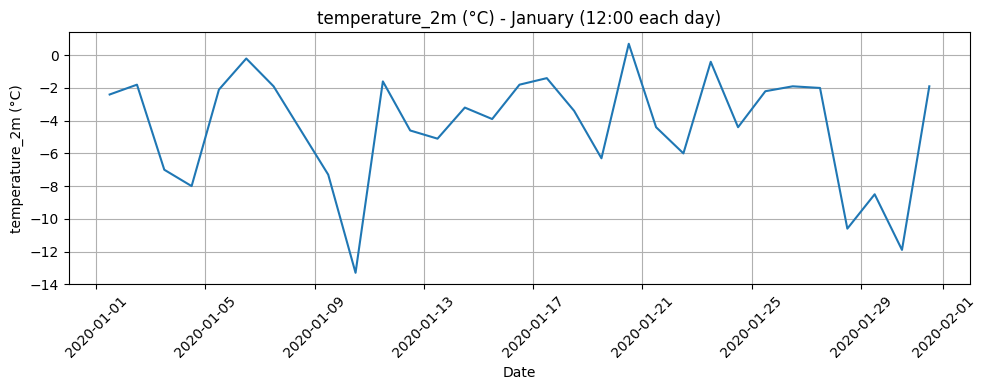

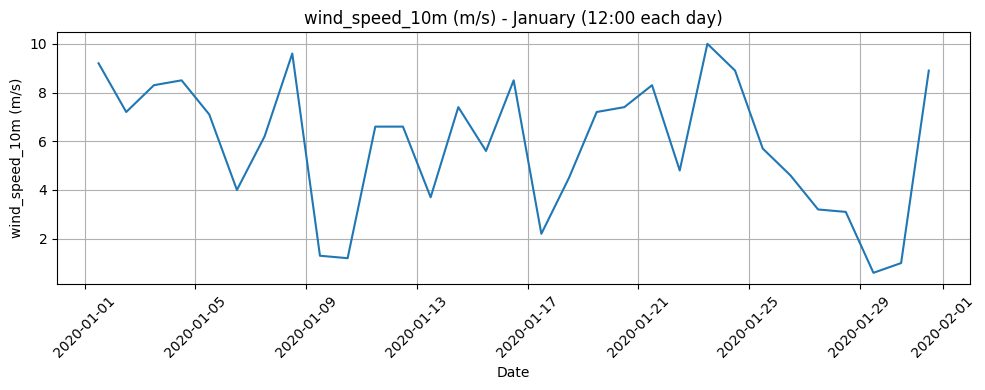

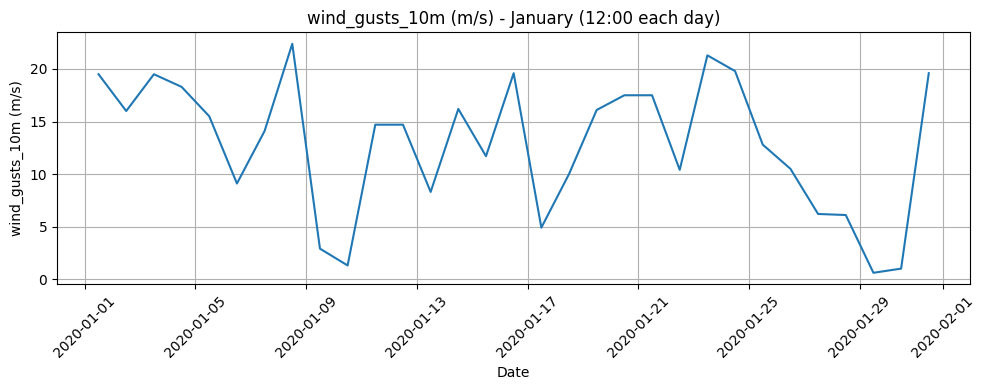

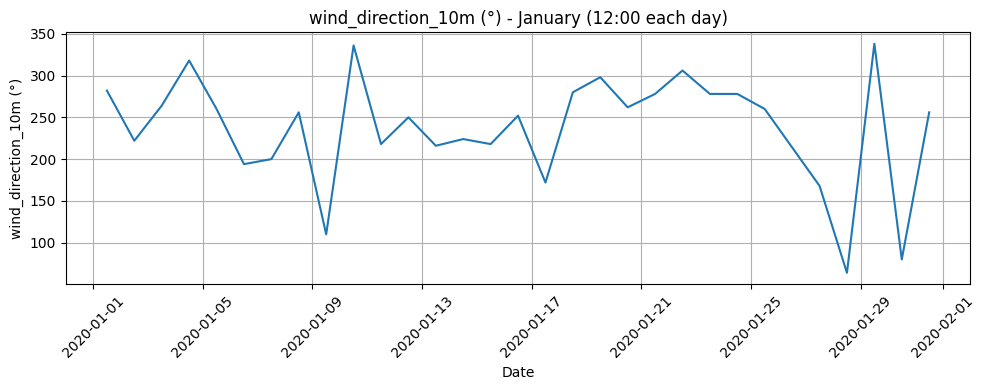

In [10]:
import matplotlib.pyplot as plt
x = df_jan_noon['time']  # x-axis (only one per day now)

for col in data_columns:
    plt.figure(figsize=(10,4))
    plt.plot(x, df_jan_noon[col])
    plt.title(f"{col} - January (12:00 each day)")
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

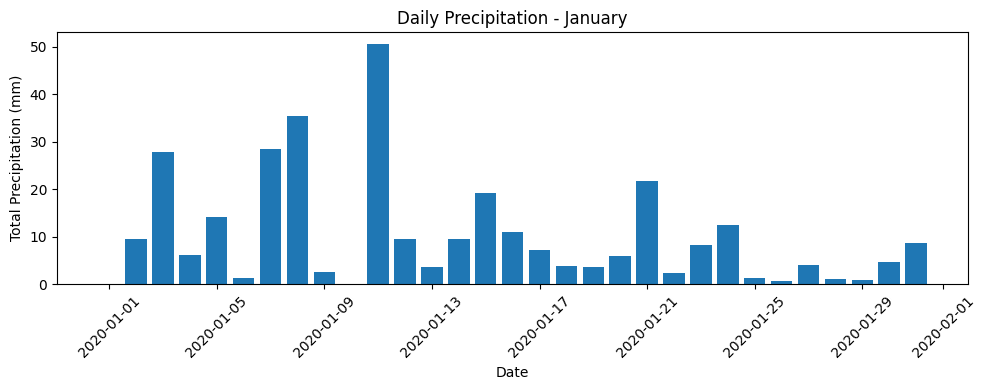

In [11]:
# Plot total daily precipitation for January as a bar chart
plt.figure(figsize=(10,4))
plt.bar(df_jan_precip['date'], df_jan_precip['precipitation (mm)'])
plt.title("Daily Precipitation - January")
plt.xlabel("Date")
plt.ylabel("Total Precipitation (mm)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Plot all columns together
Consider how to make this natural, given that the scales are different.
Deciding that I want a left y-axis with values corresponding to temperature and windspeed and wind gusts. The right y-axis for percipitation. Deciding to show the wind direction as an arrow for the wind direction at noon each day. 

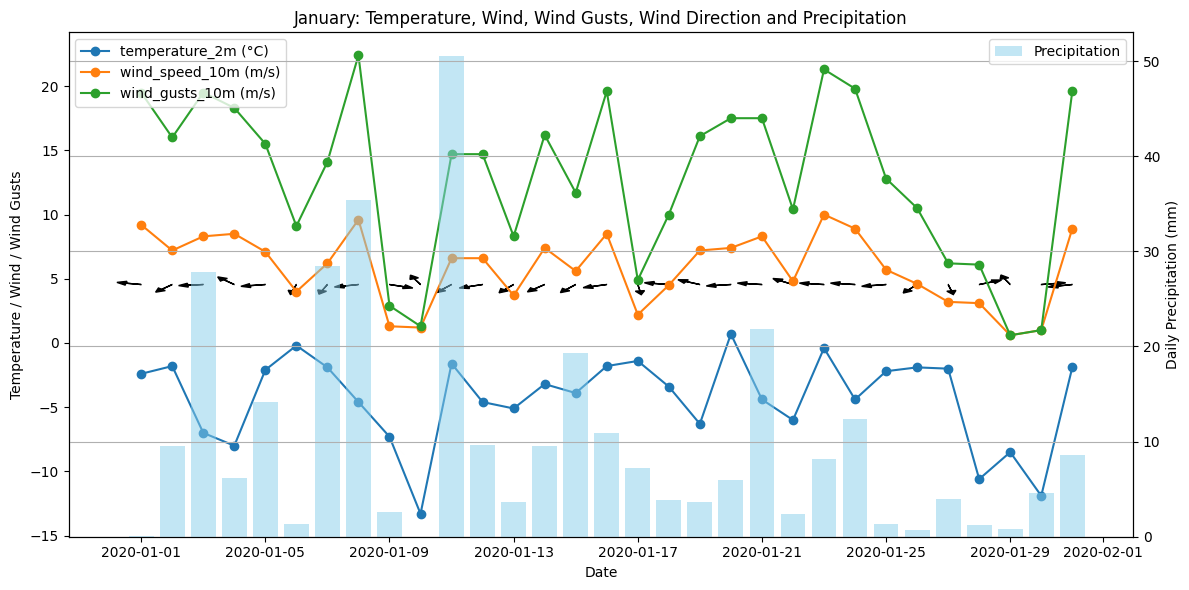

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Left y-axis: temperature, wind, wind gusts
left_columns = ['temperature_2m (°C)', 'wind_speed_10m (m/s)', 'wind_gusts_10m (m/s)']

fig, ax1 = plt.subplots(figsize=(12,6))

# Plot daily value at noon for left-axis variables
for col in left_columns:
    ax1.plot(df_jan_noon['time'].dt.date, df_jan_noon[col], marker='o', label=col)

ax1.set_xlabel("Date")
ax1.set_ylabel("Temperature / Wind / Wind Gusts")
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Wind direction arrows (centered vertically)
arrow_length = 0.5
y_center = (ax1.get_ylim()[0] + ax1.get_ylim()[1]) / 2 # Place arrows at the vertical center of the left y-axis

for _, row in df_jan_noon.iterrows():
    direction_deg = row['wind_direction_10m (°)']
    direction_rad = np.deg2rad(direction_deg) # Convert degrees to radians for trigonometric functions
    dx = arrow_length * np.sin(direction_rad) # Calculate x and y components
    dy = arrow_length * np.cos(direction_rad)
    ax1.arrow(row['time'].date(), y_center, dx, dy, head_width=0.3, head_length=0.3, fc='k', ec='k') # Draw arrow. what is fc and ec?


# Right y-axis: precipitation using df_jan_precip
ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
ax2.bar(df_jan_precip['date'], df_jan_precip['precipitation (mm)'],
        color='skyblue', alpha=0.5, label='Precipitation')
ax2.set_ylabel("Daily Precipitation (mm)")
ax2.legend(loc='upper right')

# Final plot formatting
plt.title("January: Temperature, Wind, Wind Gusts, Wind Direction and Precipitation")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
